In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/creditcard.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc,accuracy_score
from sklearn.linear_model import LogisticRegression

### Data

In [3]:
df = pd.read_csv('/content/creditcard.csv')

In [4]:
df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
7267,9663,-1.178157,0.715470,1.423573,1.467534,0.377157,0.222116,0.149876,0.142945,1.261478,...,-0.184988,0.075538,0.054361,-0.073493,-0.181383,-0.294114,0.074951,0.169789,9.99,0.0
6250,7325,-0.303522,0.321466,1.844147,-0.345545,-0.921119,-0.432680,-0.069181,-0.138086,0.329046,...,-0.089949,-0.016212,-0.182145,0.321759,-0.038172,-0.163742,-0.037349,0.084004,29.70,0.0
3452,2940,-0.439824,0.581561,1.269115,-1.945840,-0.020154,-1.371057,1.016856,-0.262751,0.995704,...,0.107704,0.657713,-0.184671,0.575560,-0.115917,-0.838270,0.247315,-0.014565,1.00,0.0
12823,22510,-0.397710,0.973621,0.116212,-0.083219,0.509627,0.345134,0.359058,0.541968,0.537623,...,-0.414982,-1.281486,0.215612,-1.291749,-0.533753,-0.075589,-0.162526,-0.059201,49.75,0.0
132,83,-1.864990,0.910874,1.724863,-1.748371,0.578943,-0.832531,1.901440,-1.913986,2.112375,...,-0.318597,0.073323,-0.061693,0.547204,-0.466798,0.408030,-2.377933,-1.255549,7.69,0.0
2253,1792,1.130619,0.209759,0.465968,2.504110,0.008139,0.375406,-0.049661,0.091068,-0.101357,...,-0.335564,-0.998007,-0.072024,-0.673072,0.466061,-0.119810,-0.006353,0.023120,53.05,0.0
6539,7919,0.338743,-1.857191,0.339665,0.544193,-1.220082,0.301536,-0.194488,-0.067858,2.478578,...,-0.041795,-0.821458,-0.473014,-0.549962,0.017325,0.961056,-0.158983,0.084444,500.00,0.0
13870,24628,-6.207977,5.584212,-1.935158,-1.396833,-0.843984,-0.437452,-0.023030,0.741624,5.275118,...,-1.182477,-1.477112,0.167703,-0.941288,1.158800,0.136628,2.087484,1.121578,8.96,0.0
11015,18989,1.203869,-0.904193,1.133834,-0.491279,-1.515825,-0.047618,-1.383291,0.233086,0.916094,...,0.322664,0.948777,-0.056660,0.152071,0.190624,-0.085180,0.003401,0.009932,49.00,0.0
6641,8169,0.857321,4.093912,-7.423894,7.380245,0.973366,-2.730762,-1.496497,0.543015,-2.351190,...,0.375026,0.145400,0.240603,-0.234649,-1.004881,0.435832,0.618324,0.148469,1.00,1.0


In [5]:
df.shape

(15936, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15936 entries, 0 to 15935
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    15936 non-null  int64  
 1   V1      15936 non-null  float64
 2   V2      15936 non-null  float64
 3   V3      15936 non-null  float64
 4   V4      15936 non-null  float64
 5   V5      15936 non-null  float64
 6   V6      15936 non-null  float64
 7   V7      15936 non-null  float64
 8   V8      15936 non-null  float64
 9   V9      15936 non-null  float64
 10  V10     15936 non-null  float64
 11  V11     15936 non-null  float64
 12  V12     15936 non-null  float64
 13  V13     15936 non-null  float64
 14  V14     15936 non-null  float64
 15  V15     15936 non-null  float64
 16  V16     15936 non-null  float64
 17  V17     15936 non-null  float64
 18  V18     15936 non-null  float64
 19  V19     15936 non-null  float64
 20  V20     15936 non-null  float64
 21  V21     15936 non-null  float64
 22

### Data Visulisation:

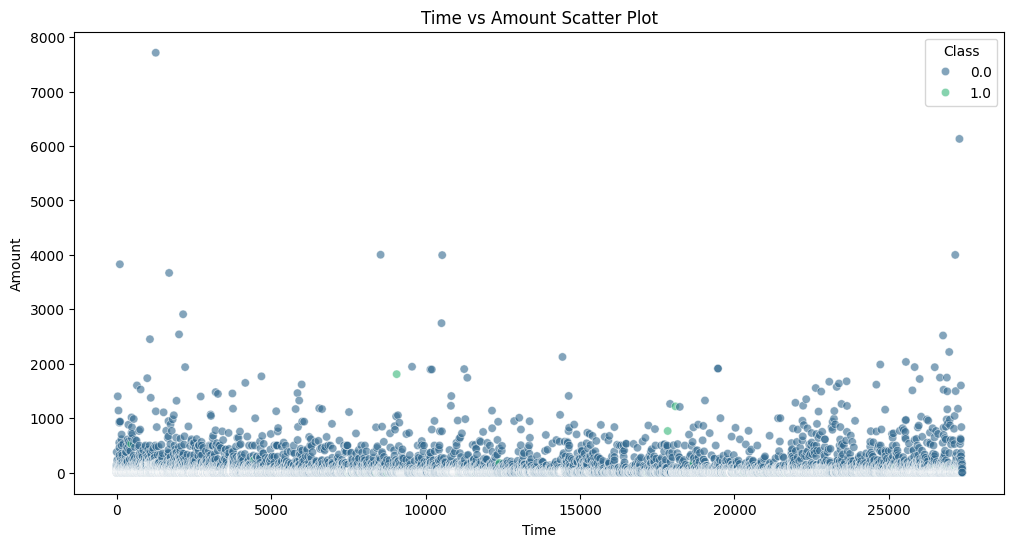

In [7]:
# 1. Time vs Amount scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Time', y='Amount', hue='Class', palette='viridis', alpha=0.6)
plt.title('Time vs Amount Scatter Plot')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.legend(title='Class')
plt.show()

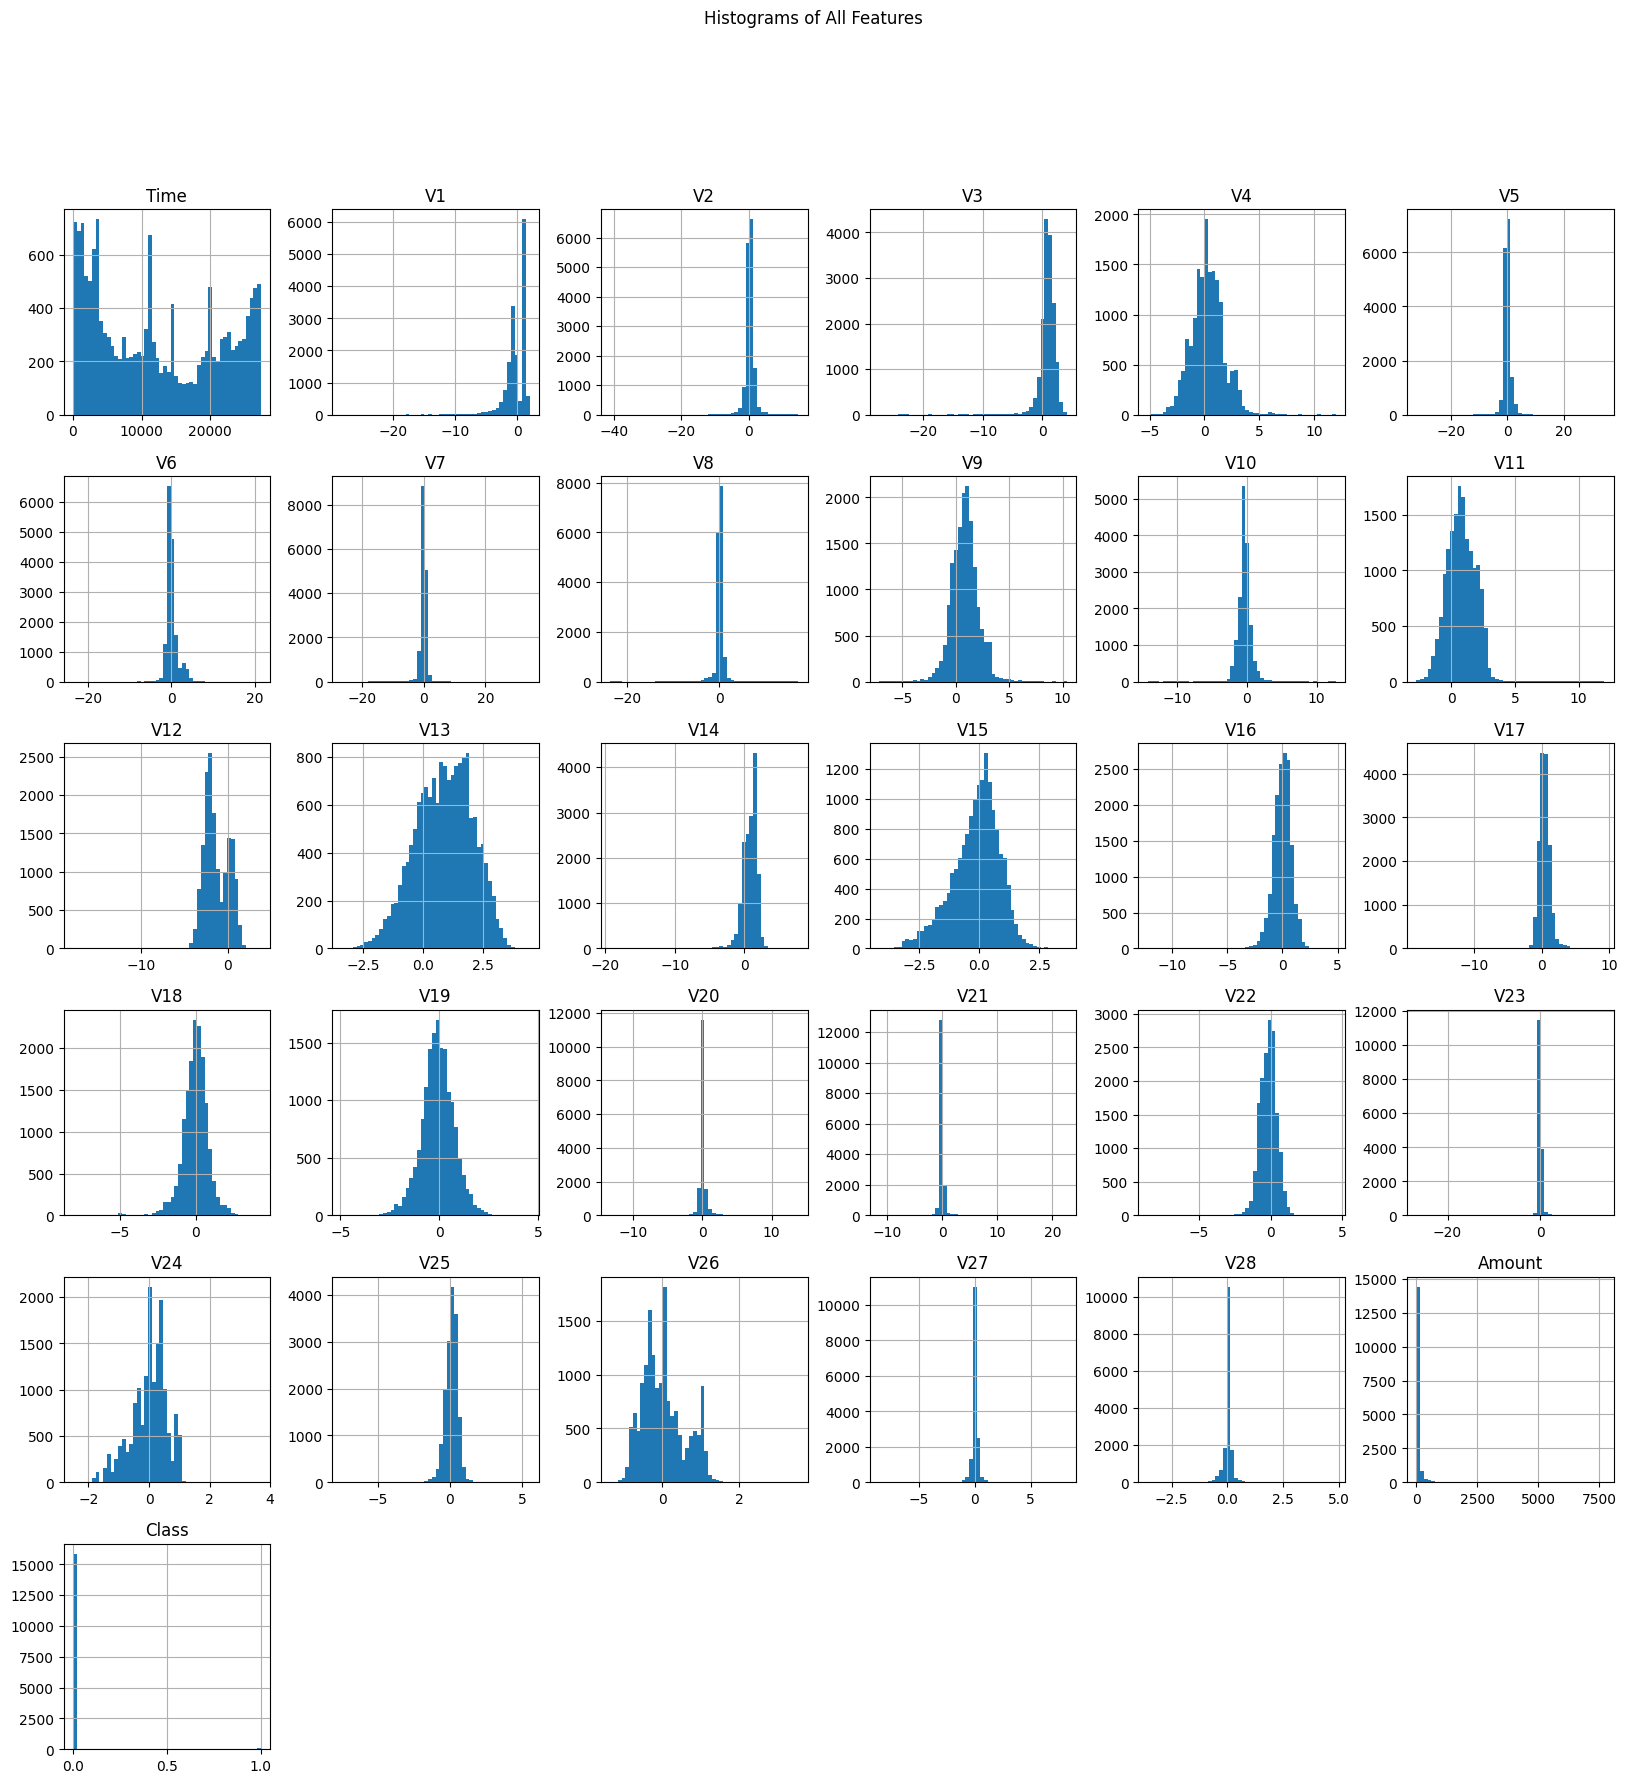

In [8]:
# 2. Histograms of the features
df.hist(figsize=(20, 20), bins=50)
plt.suptitle('Histograms of All Features')
plt.show()

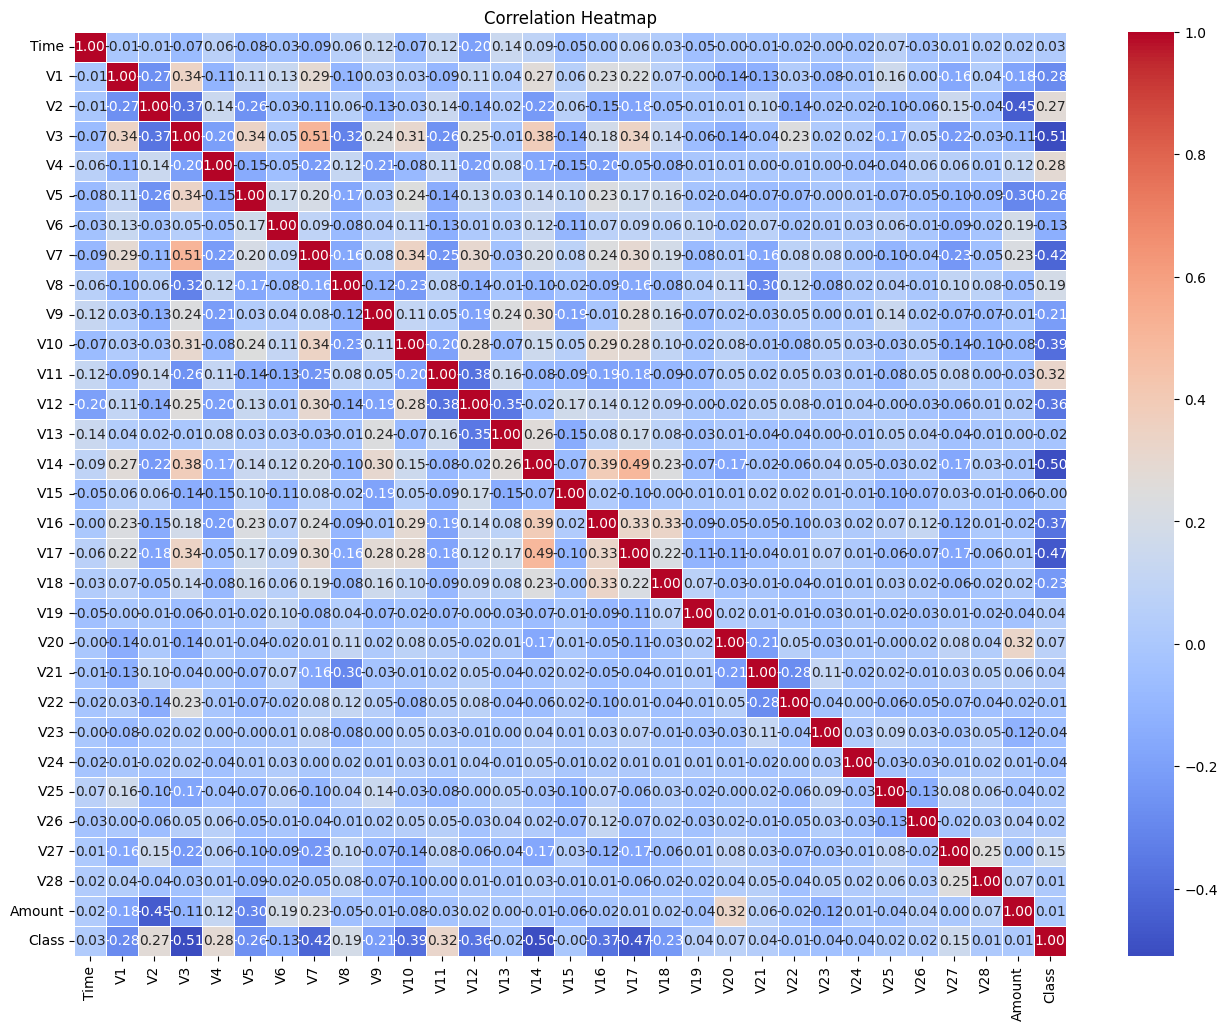

In [9]:
# 3. Correlation heatmap
plt.figure(figsize=(16, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Train test

In [10]:
X = df.drop('Class',axis=1)
y = df['Class']

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Model:

In [14]:
X_train_dropped = X_train.dropna()
y_train_dropped = y_train[X_train.index.isin(X_train_dropped.index)]

# Now fit the model with the data without NaNs
log_reg_model.fit(X_train_dropped, y_train_dropped)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [19]:
log_reg_model.fit(X_train_dropped, y_train_dropped)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [20]:
print(X_train_dropped.shape)
print(y_train_dropped.shape)


(12747, 30)
(12747,)


In [22]:
X_train_dropped = X_train.dropna()
y_train_dropped = y_train[X_train.index.isin(X_train_dropped.index)]

X_test_dropped = X_test.dropna()
y_test_dropped = y_test[X_test.index.isin(X_test_dropped.index)]


In [23]:
log_reg_model.fit(X_train_dropped, y_train_dropped)
y_train_pred = log_reg_model.predict(X_train_dropped)
y_test_pred = log_reg_model.predict(X_test_dropped)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
train_accuracy = accuracy_score(y_train_dropped, y_train_pred)
test_accuracy = accuracy_score(y_test_dropped, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")


Training Accuracy: 0.998274103710677
Testing Accuracy: 0.9990589711417817


In [27]:
# Assuming you have already preprocessed X_test to handle NaN values
y_pred = log_reg_model.predict(X_test_dropped)


In [28]:
print("\nClassification Report:")
print(classification_report(y_test_dropped, y_pred))



Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3170
         1.0       0.94      0.89      0.91        18

    accuracy                           1.00      3188
   macro avg       0.97      0.94      0.96      3188
weighted avg       1.00      1.00      1.00      3188



### Accuracy:

In [29]:
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy score: ',accuracy)

Accuracy score:  0.9990589711417817


In [31]:
# Assuming you have already preprocessed X_test to handle NaN values
y_pred_prob = log_reg_model.predict_proba(X_test_dropped)[:, 1]


In [33]:
roc_auc = roc_auc_score(y_test_dropped, y_pred_prob)
print(f"\nROC-AUC Score: {roc_auc}")




ROC-AUC Score: 0.9946898002103048


In [36]:
from sklearn.metrics import roc_curve


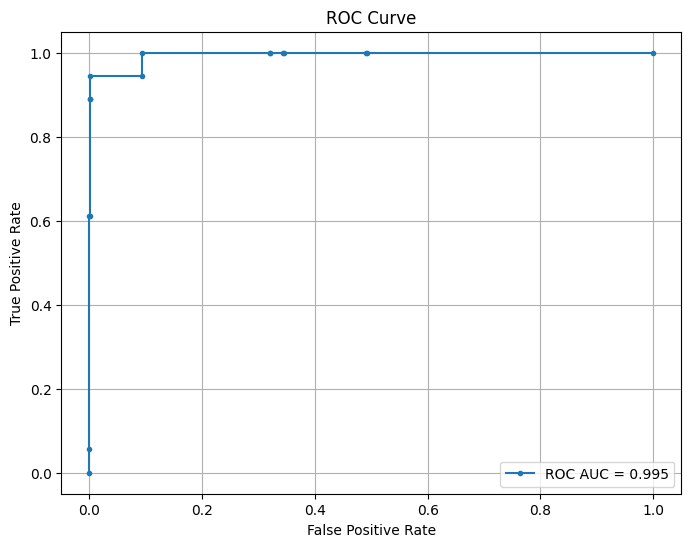

In [37]:

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_dropped, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label=f'ROC AUC = {roc_auc:.3f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


Area Under the Precision-Recall Curve: 0.9173523612182114


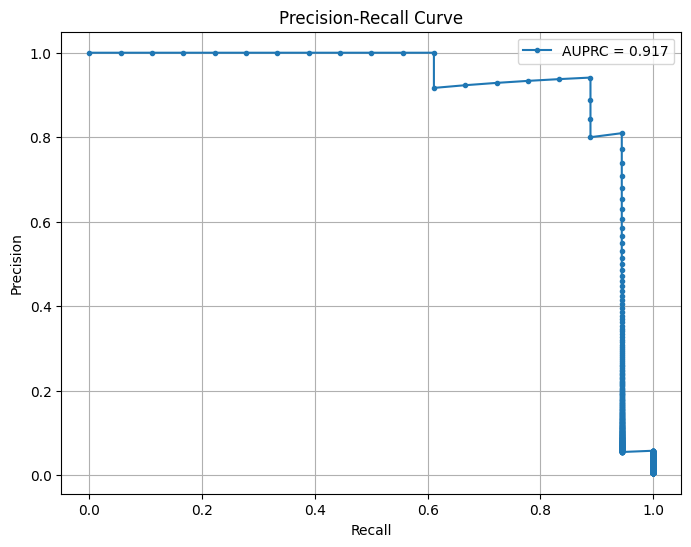

In [38]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
auprc = auc(recall, precision)
print(f"Area Under the Precision-Recall Curve: {auprc}")

# Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'AUPRC = {auprc:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

Confusion Matrix:
[[3169    1]
 [   2   16]]


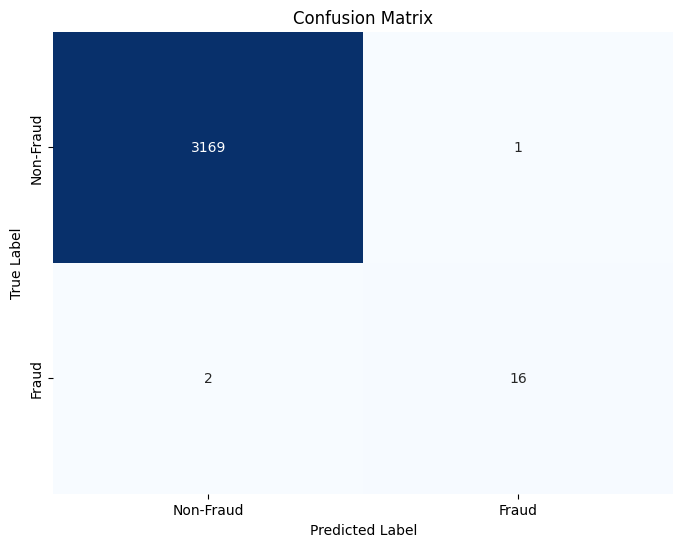

In [39]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Confusion Matrix ni
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()